<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    66.692647  31.370177  82.970570   4.135572  195.168967   
      1.0    69.487556  74.006214  42.471009 -17.583185  178.381593   
      2.0    39.739806  90.015664  51.120392   7.971194  198.847057   
      3.0    35.205702  53.235243  65.325039 -16.074282  147.691702   
      4.0    70.706908  69.308830  39.232894   1.746723  190.995356   
...                ...        ...        ...        ...         ...   
999.0 115.0  54.268114  64.322642  93.875938  -0.029562  222.437133   
      116.0  43.739899  38.662709  41.433066   9.524637  143.360311   
      117.0  98.405914  44.730050  98.374201   2.251711  253.761876   
      118.0  31.185206  28.501604  97.745562   7.682309  175.114681   
      119.0  85.736118  30.452380  69.594660  -0.619039  195.164119   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    190.904448   4.264518  
      1.0    195.881572 -17.499979  
      2.0    193.252291   5.594766  
      3.0    166.218706 -18.527004  
      4.0    189.023935   1.971420  
...                 ...        ...  
999.0 115.0  221.517435   0.919697  
      116.0  134.486036   8.874275  
      117.0  248.878190   4.883686  
      118.0  165.178485   9.936195  
      119.0  194.124909   1.039210  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    66.692647  31.370177  82.970570   4.135572  195.168967   
      1.0    69.487556  74.006214  42.471009 -17.583185  178.381593   
      2.0    39.739806  90.015664  51.120392   7.971194  198.847057   
      3.0    35.205702  53.235243  65.325039 -16.074282  147.691702   
      4.0    70.706908  69.308830  39.232894   1.746723  190.995356   
...                ...        ...        ...        ...         ...   
999.0 115.0  54.268114  64.322642  93.875938  -0.029562  222.437133   
      116.0  43.739899  38.662709  41.433066   9.524637  143.360311   
      117.0  98.405914  44.730050  98.374201   2.251711  253.761876   
      118.0  31.185206  28.501604  97.745562   7.682309  175.114681   
      119.0  85.736118  30.452380  69.594660  -0.619039  195.164119   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    190.904448   4.264518  
      1.0    195.881572 -17.499979  
      2.0    193.252291   5.594766  
      3.0    166.218706 -18.527004  
      4.0    189.023935   1.971420  
...                 ...        ...  
999.0 115.0  221.517435   0.919697  
      116.0  134.486036   8.874275  
      117.0  248.878190   4.883686  
      118.0  165.178485   9.936195  
      119.0  194.124909   1.039210  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,66.692647,31.370177,82.970570,4.135572,195.168967,190.904448,4.264518
1,0.0,1.0,69.487556,74.006214,42.471009,-17.583185,178.381593,195.881572,-17.499979
2,0.0,2.0,39.739806,90.015664,51.120392,7.971194,198.847057,193.252291,5.594766
3,0.0,3.0,35.205702,53.235243,65.325039,-16.074282,147.691702,166.218706,-18.527004
4,0.0,4.0,70.706908,69.308830,39.232894,1.746723,190.995356,189.023935,1.971420
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.268114,64.322642,93.875938,-0.029562,222.437133,221.517435,0.919697
119996,999.0,116.0,43.739899,38.662709,41.433066,9.524637,143.360311,134.486036,8.874275
119997,999.0,117.0,98.405914,44.730050,98.374201,2.251711,253.761876,248.878190,4.883686
119998,999.0,118.0,31.185206,28.501604,97.745562,7.682309,175.114681,165.178485,9.936195


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    66.692647  31.370177  82.970570   4.135572  195.168967   
      1.0    69.487556  74.006214  42.471009 -17.583185  178.381593   
      2.0    39.739806  90.015664  51.120392   7.971194  198.847057   
      3.0    35.205702  53.235243  65.325039 -16.074282  147.691702   
      4.0    70.706908  69.308830  39.232894   1.746723  190.995356   
...                ...        ...        ...        ...         ...   
999.0 115.0  54.268114  64.322642  93.875938  -0.029562  222.437133   
      116.0  43.739899  38.662709  41.433066   9.524637  143.360311   
      117.0  98.405914  44.730050  98.374201   2.251711  253.761876   
      118.0  31.185206  28.501604  97.745562   7.682309  175.114681   
      119.0  85.736118  30.452380  69.594660  -0.619039  195.164119   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    190.904448   4.264518  
      1.0    195.881572 -17.499979  
      2.0    193.252291   5.594766  
      3.0    166.218706 -18.527004  
      4.0    189.023935   1.971420  
...                 ...        ...  
999.0 115.0  221.517435   0.919697  
      116.0  134.486036   8.874275  
      117.0  248.878190   4.883686  
      118.0  165.178485   9.936195  
      119.0  194.124909   1.039210  

[120000 rows x 7 columns]

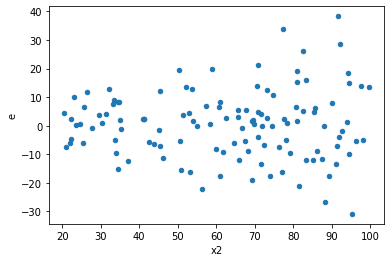

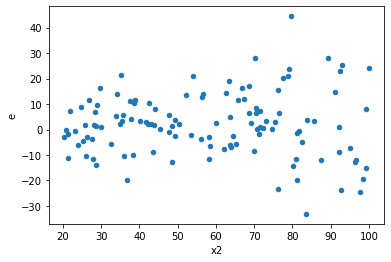

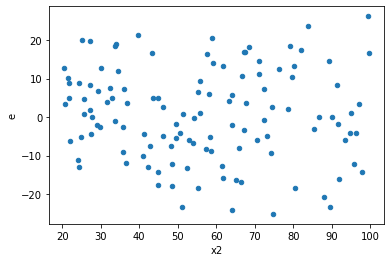

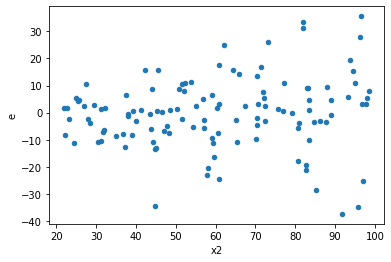

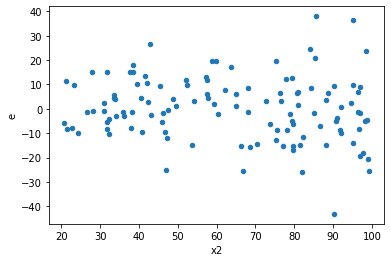

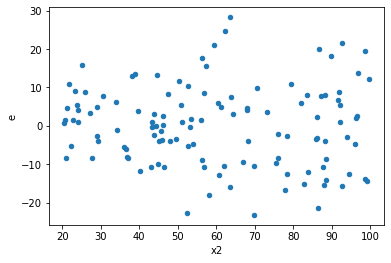

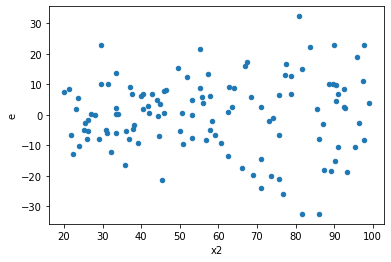

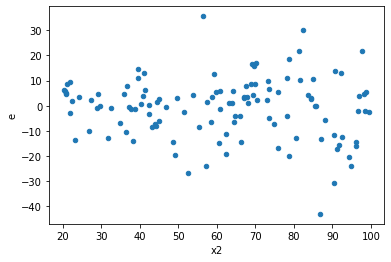

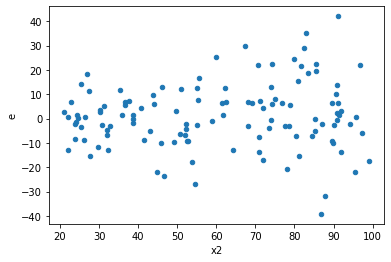

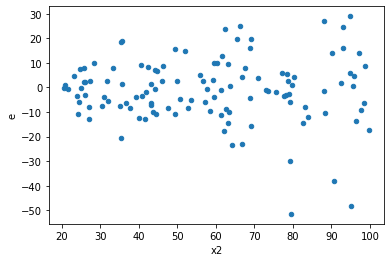

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,4933.318145545511,7817.15644265716,109.62929212323357,173.71458761460357,1.5845636166229382,0.12633628470888225,0.9368318576455589,0.06316814235444113,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,4462.396955964295,9120.566945224546,99.16437679920655,202.67926544943435,2.0438717207877017,0.018282684491002232,0.9908586577544989,0.009141342245501116,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,4722.467642302592,8793.663040244342,104.94372538450205,195.41473422765205,1.8620906920511386,0.03964388803042773,0.9801780559847861,0.019821944015213866,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,5023.464987047698,8311.811175261646,111.63255526772662,184.70691500581435,1.6545972146103316,0.0947359912007999,0.9526320043996,0.04736799560039995,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,6062.3646771720605,8677.123307189671,134.719215048268,192.8249623819927,1.4313100199767805,0.23290007254700607,0.883549963726497,0.11645003627350303,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,4391.644893996379,9018.239322258081,97.5921087554751,200.40531827240181,2.053499210418063,0.01754707481606821,0.9912264625919659,0.008773537408034104,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,5167.897407794536,7835.339300781064,114.84216461765635,174.1186511284681,1.5161561235645526,0.16659177995408458,0.9167041100229577,0.08329588997704229,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,5067.05127101051,13022.260384832221,112.60113935578912,289.3835641073827,2.5699878861172887,0.001981212725673087,0.9990093936371635,0.0009906063628365436,Reject001=0 : Heteroscedasticity
9.0,45.0,45.0,4692.54782972244,10786.236039785868,104.27884066049866,239.69413421746373,2.2985884068066844,0.00618554297064966,0.9969072285146752,0.00309277148532483,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,4933.318145545511,7817.15644265716,109.62929212323357,173.71458761460357,1.5845636166229382,0.12633628470888225,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,4462.396955964295,9120.566945224546,99.16437679920655,202.67926544943435,2.0438717207877017,0.018282684491002232,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,4722.467642302592,8793.663040244342,104.94372538450205,195.41473422765205,1.8620906920511386,0.03964388803042773,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,5023.464987047698,8311.811175261646,111.63255526772662,184.70691500581435,1.6545972146103316,0.0947359912007999,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,6062.3646771720605,8677.123307189671,134.719215048268,192.8249623819927,1.4313100199767805,0.23290007254700607,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,5494.817163271634,3855.5329380902836,122.10704807270298,85.67850973533963,0.7016671935622122,0.23851348072322454,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,4391.644893996379,9018.239322258081,97.5921087554751,200.40531827240181,2.053499210418063,0.01754707481606821,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,5167.897407794536,7835.339300781064,114.84216461765635,174.1186511284681,1.5161561235645526,0.16659177995408458,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,5067.05127101051,13022.260384832221,112.60113935578912,289.3835641073827,2.5699878861172887,0.001981212725673087,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      785
Reject001=0 : Heteroscedasticity    215
Name: Result_test, dtype: int64